# Analog and Digital Data

## Learning Objectives
*At the conclusion of in-class and outside learning, participants will be able to:*
- Convert values between between equivalent binary, decimal, and binary-coded decimal representations.
- Compare binary, decimal, and binary-coded decimal representations in terms of storage size and ease of math operations.
- For an analog-to-digital convertor with a given full-scale value, bit resolution, and analog value, calculate the resulting digital signal.
- Based on the least significant bit of an analog-to-digital converter, estimate the relative uncertainty of a digitized value.
- Select an appropriate sampling frequency based on the signal to be digitized in a specific measurement. 

## Electrical Domains

### Analog Signals
Information is encoded as the *magnitude* of voltage, current, charge, or power. In analog signals, values of the magnitude are continuous and  an be measured continuously or as specific points in time.

### Digital Signals
Most modern instrument digitize analog signals, that is, converts continuos values of magnitude to discrete values of magnitude. This process enables the interface with computers and will be the focus a couple of days from now.

## Number Systems

### Decimal Number System

Each digit represents the coefficient of some power of 10.

### Binary

Each digit represents the coefficient of some power of 2.

### Binary-Coded Decimals

Binary bits are arranged in groups of four to represent the decimal numbers 0-9


## Analog-to-digital conversion
Analog-to-digital conversion (ADC) is the process of transforming a continuous analog signal into a discrete digital representation. It involves sampling the analog signal at regular intervals and quantizing each sample to a finite set of numerical values, typically expressed in binary. This conversion allows analog information to be processed, stored, and manipulated by digital systems, enabling the interface between the physical world of continuous signals and the digital realm of computers and digital electronics.
#### Example
An 8-bit digitizer has a resolution of 256 discrete levels ($2^8 = 256$). This means it can represent an analog signal using 256 different digital values, ranging from 0 to 255. The smallest change in input voltage that can be detected and represented is 1/256th of the full-scale input range (FSR), often referred to as the least significant bit (LSB) or quantization step.  

## In Groups:
For the following example:
- How many quantization levels are there in this plot? 
- What is the resolution of this digitizer in bits?
- What is the resolution of this digitizer in volts?
- For an 8-bit digitizer with a FSR of 5 V, what bit code would a voltage of 0.1823672 yield?

![ADC](./adc-figures/ADC_voltage_resolution.svg)
*From Wikimedia Commons*

## In Groups:
- Discuss pros and cons of increasing the:
    - number of bits
    - FSR

## Time-Dependent Measurements

Most instruments acquire digitize data as a function of time, at fixed time intervals.
- Time period
- Frequency

The frequency needed for an experiment depends on the measurement and the goals of the measurement, e.g.,
- Which propert(ies) of the signal needs to be monitored?
- How quickly does the signal change?

In [1]:
"""
This block of code enables and formats the plots shown below.
"""

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import norm

mpl.rcParams['font.size'] = 16
mpl.rcParams['font.family'] = "Open Sans"

mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['lines.markersize'] = 10.0
mpl.rcParams['axes.linewidth'] = 3.0
mpl.rcParams['axes.labelweight'] = "bold"
mpl.rcParams['markers.fillstyle'] = "none"

mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.direction'] = "in"
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = mpl.rcParams['xtick.major.size']
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['xtick.minor.width'] = mpl.rcParams['xtick.major.width']
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.direction'] = "in"
mpl.rcParams['ytick.major.size'] = mpl.rcParams['xtick.major.size']
mpl.rcParams['ytick.major.width'] = mpl.rcParams['xtick.major.width']
mpl.rcParams['ytick.minor.width'] = mpl.rcParams['xtick.minor.width']

mpl.rcParams['legend.fancybox'] = True

mpl.rcParams['axes.titlesize'] = mpl.rcParams['font.size']
mpl.rcParams['axes.titleweight'] = mpl.rcParams['axes.labelweight']

# Generate a color palate.
colors = mpl.cm.magma(np.linspace(0,1,5))

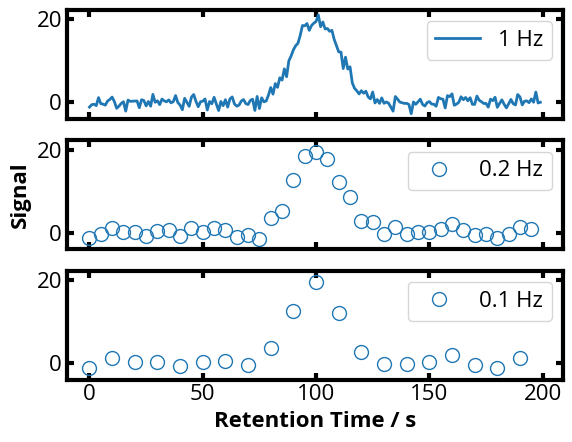

In [2]:
fig, ax = plt.subplots(3,1,sharex=True,sharey=True)
offset = 0.
tr = 100.
dt = 1.
time = np.arange(0,200.,dt)

raw = np.zeros_like(time)
raw += np.random.randn(np.size(time))   
peak = norm.pdf(time, tr,scale=10.)
raw += peak*20/peak.max()

ax[0].plot(time, raw, label='1 Hz')
ax[1].plot(time[::5], raw[::5], 'o', label = '0.2 Hz')
ax[2].plot(time[::10], raw[::10], 'o', label = '0.1 Hz')

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[2].set_xlabel('Retention Time / s')
ax[1].set_ylabel('Signal')
plt.show()



## Nyquist Frequency

When a continuous function or signal is converted into a discrete sequence, the Nyquist Frequency is half the sampling frequency or the highest frequency that can be accurately measured

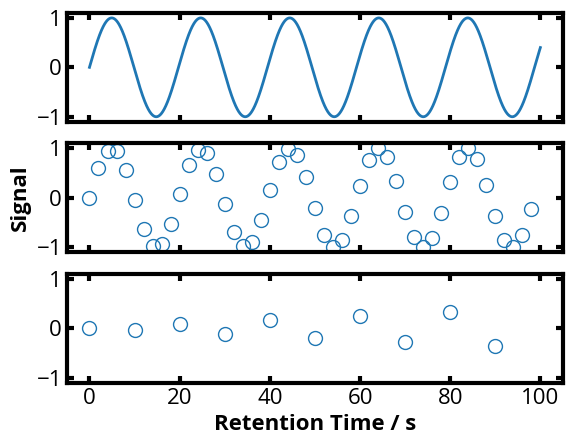

In [3]:
fig, ax = plt.subplots(3,1,sharex=True,sharey=True)
time = np.arange(0,100.,0.01)
signal = np.sin(time/np.pi)

ax[0].plot(time, signal, label='100 Hz')
ax[1].plot(time[::200], signal[::200], 'o', label = '0.5 Hz')
ax[2].plot(time[::1000], signal[::1000], 'o', label = '0.1 Hz')

ax[2].set_xlabel('Retention Time / s')
ax[1].set_ylabel('Signal')

plt.show()

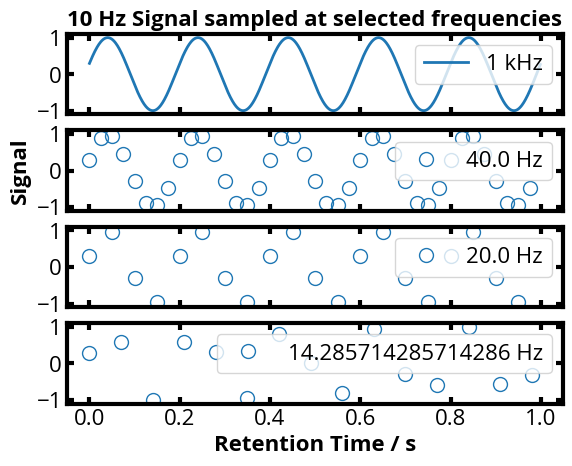

In [37]:
fig, ax = plt.subplots(4,1,sharex=True,sharey=True)

sample_frequency = 1000.
sample_period = 1./sample_frequency
time = np.arange(0,1.,sample_period)
signal_frequency = 10.
signal = np.sin(signal_frequency*np.pi*time+0.3)

ax[0].plot(time, signal, label='1 kHz')

undersample = 25
ax[1].plot(time[::undersample], signal[::undersample], 'o', label = str(sample_frequency/undersample)+' Hz')
undersample = 50
ax[2].plot(time[::undersample], signal[::undersample], 'o', label = str(sample_frequency/undersample)+' Hz')
undersample = 70
ax[3].plot(time[::undersample], signal[::undersample], 'o', label = str(sample_frequency/undersample)+' Hz')

ax[0].set_title('10 Hz Signal sampled at selected frequencies')
ax[3].set_xlabel('Retention Time / s')
ax[1].set_ylabel('Signal')
for i in range(0,4):
    ax[i].legend(loc='upper right')
plt.show()